<a href="https://colab.research.google.com/github/mig7avilg-dot/DATA_SCIENCE/blob/master/HANDS_ON_GRUPO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensionality Reduction — Hands‑On

0) Setup

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1) Load & Standardize the Dataset

In [2]:
#Load & Standardize the Dataset
digits = load_digits()
scalar = StandardScaler()
scalar.fit(digits.data)
X_std = scalar.transform(digits.data)

2) Principal Component Analysis (PCA)\
2.1 Fit PCA on X_std\
2.2 Produce a 2‑D scatter of the first two principal components (PC1 vs PC2)
colored by digit label\
2.3 Plot the scree plot of explained variance ratio and the cumulative explained variance.\
2.4 Report the minimum number of components to explain at least 95% of the variance.

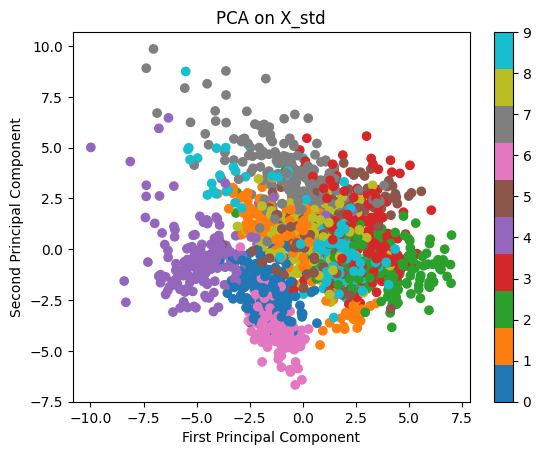

In [3]:
# 2) Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
plt.scatter(X_pca[:,0], X_pca[:,1], c=digits.target, cmap='tab10')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on X_std')
plt.colorbar();

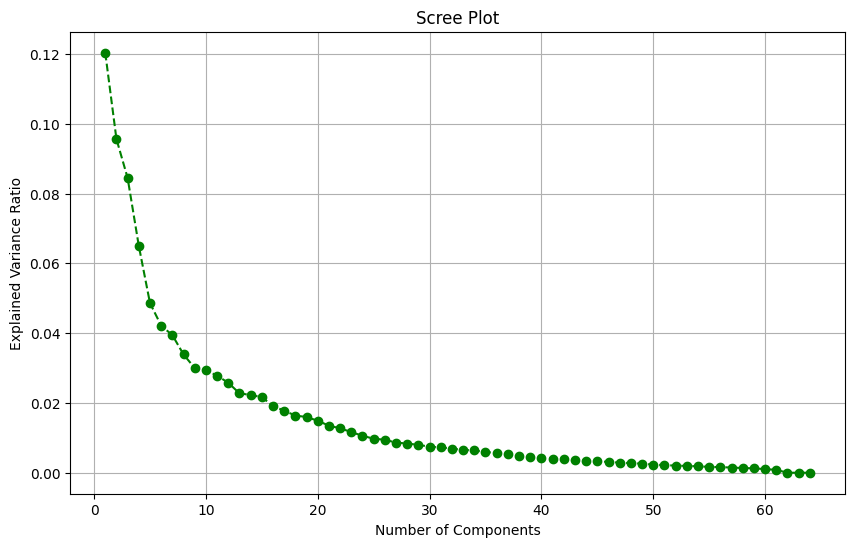

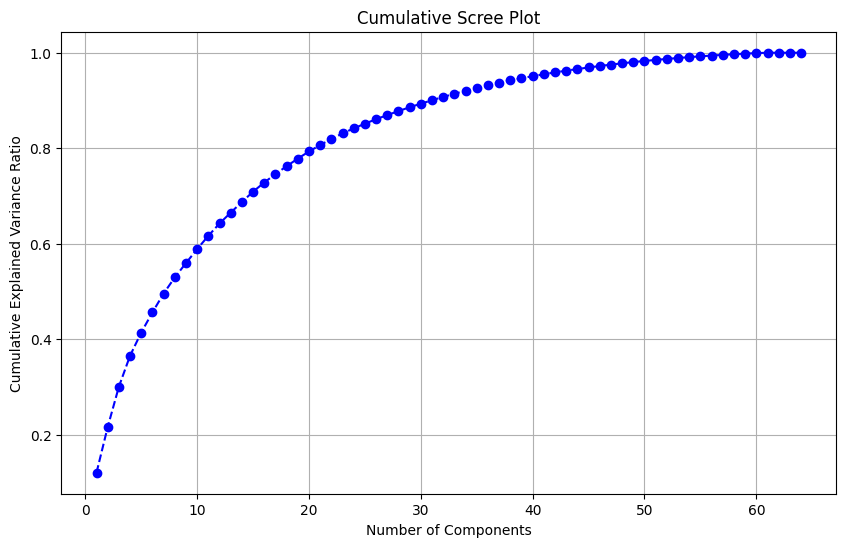

In [4]:
# Plot the scree plot of explained variance ratio and the cumulative explained
pca_full_std = PCA(n_components=None)
pca_full_std.fit(X_std)
exp_variance_ratio = pca_full_std.explained_variance_ratio_
cum_exp_variance_ratio = np.cumsum(exp_variance_ratio)

plt.figure(figsize=(10,6))
plt.plot(range(1,len(exp_variance_ratio)+1), exp_variance_ratio, marker = 'o', linestyle = '--', color = 'g')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()
plt.figure(figsize = (10,6))
plt.plot(range(1,len(cum_exp_variance_ratio)+1), cum_exp_variance_ratio, marker = 'o' , linestyle = '--', color = 'b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Scree Plot')
plt.grid()
plt.show()

In [5]:
#Report the minimum number of components to explain at least 95% of the variance.
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_std)
print(f'The minimum number of components to explain at least 95% of the variance is {pca_95.n_components_}')

The minimum number of components to explain at least 95% of the variance is 40


3) Singular Value Decomposition (SVD)\
3.1 Compute the compact SVD of the centered data X_centered = X_std (already zero-mean) using np.linalg.svd:\
3.2 Plot the singular values (\sigma_i) on a log scale.\
3.3 Plot the cumulative energy defined as
[ E(k) = \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^r \sigma_i^2} ]
and report the k for which E(k) ≥ 0.95.\
3.4 Verify: PCA eigenvalues are proportional to (\sigma_i^2/(n-1)).

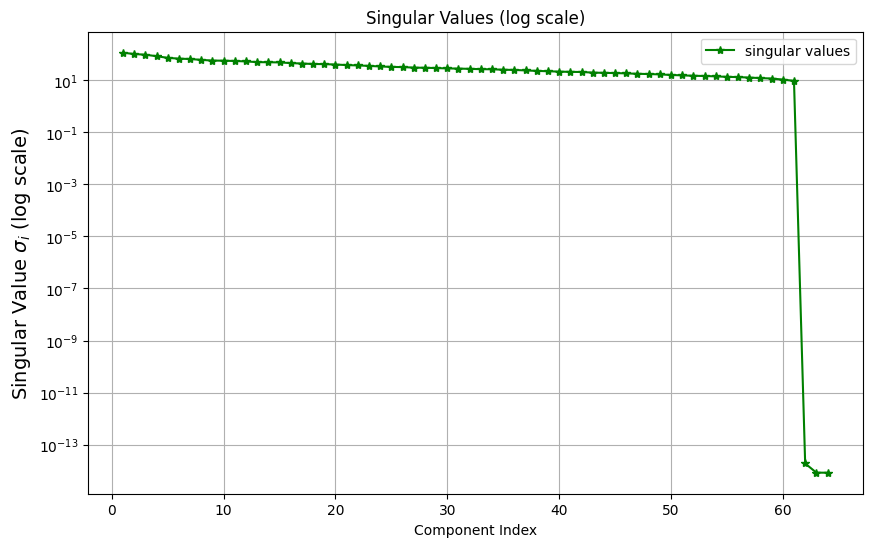

In [6]:
#Compute the compact SVD of the centered data X_centered = X_std (already zero-mean) using np.linalg.svd
X_centered = X_std - np.mean(X_std, axis=0)
U, S, Vt = np.linalg.svd(X_centered)

#Plot the singular values (\sigma_i) on a log scale.
component_indices = range(1, len(S)+1)
plt.figure(figsize=(10,6))
plt.semilogy(component_indices, S, 'g*-', label = "singular values")
plt.xlabel('Component Index')
plt.ylabel(r'Singular Value $\sigma_i$ (log scale)', fontsize=14)
plt.title('Singular Values (log scale)')
plt.legend()
plt.grid()
plt.show()


The k for which E(k) ≥ 0.95 is 40


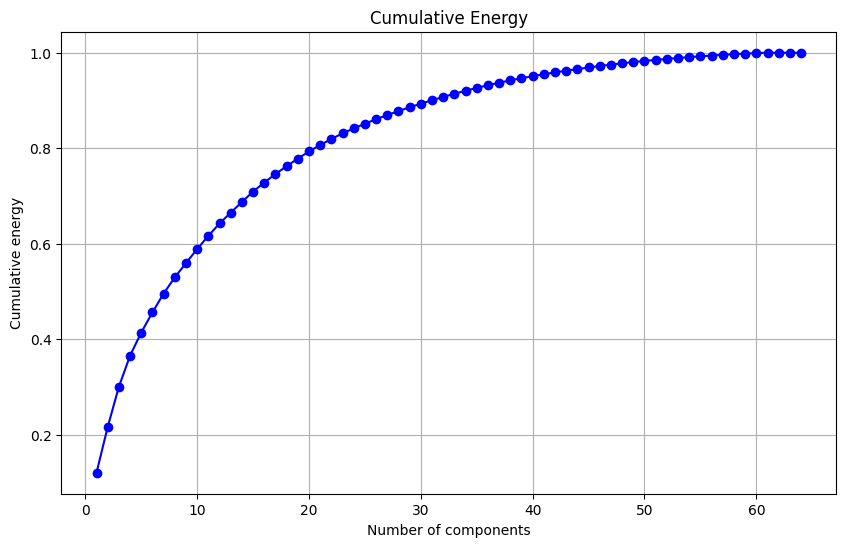

In [7]:
# Plot the cumulative energy defined as [ E(k) = \frac{\sum_{i=1}^k
# \sigma_i^2}{\sum_{i=1}^r \sigma_i^2} ] and report the k for which E(k) ≥
# 0.95.
squared_singular_values = S**2
cumulative_sume = np.cumsum(squared_singular_values)
total_sume = np.sum(squared_singular_values)
cumulative_energy = cumulative_sume/total_sume
print(f'The k for which E(k) ≥ 0.95 is {np.argmax(cumulative_energy >= 0.95)+1}')

#plot the cumulative energy
plt.figure(figsize=(10,6))
plt.plot(range(1, len(S)+1), cumulative_energy, 'bo-')
plt.xlabel("Number of components")
plt.ylabel("Cumulative energy")
plt.title("Cumulative Energy")
plt.grid()
plt.show()


In [8]:
#Verify: PCA eigenvalues are proportional to (\sigma_i^2/(n-1)).
n = X_centered.shape[0]
#calculate the eigen_values using PCA
covariance_matrix = np.cov(X_centered, rowvar = False)
eigen_values_pca = np.linalg.eigvalsh(covariance_matrix)
#calculate the singular values squared divided by (n-1)
singular_values_squared = S**2
svd_proportional = singular_values_squared/(n-1)
#compare both outputs
print("Eingen_values_PCA:")
print(eigen_values_pca)

print("\n singular values squared/(n-1):")
print(svd_proportional)

#For a more rigorous check, you can calculate the difference
#and check if it is very close to zero.
diff = np.abs(np.sort(eigen_values_pca)[::-1] - svd_proportional)
print("\n Difference:")
print(diff)
# we can see that the difference between the two arranges are rougly cero, which
# is what we want to verify.

Eingen_values_PCA:
[-9.90007908e-17 -6.94234952e-17  0.00000000e+00  5.03744402e-02
  6.32896150e-02  7.63539426e-02  8.24681230e-02  9.01854301e-02
  9.84087608e-02  1.02504338e-01  1.11886547e-01  1.19328984e-01
  1.24263708e-01  1.33210813e-01  1.43114274e-01  1.58184741e-01
  1.68752359e-01  1.76128942e-01  1.89835165e-01  2.00090902e-01
  2.07995927e-01  2.17581996e-01  2.42356600e-01  2.47830286e-01
  2.58273004e-01  2.76922851e-01  2.94066271e-01  3.19596300e-01
  3.48603059e-01  3.60945168e-01  3.91101111e-01  3.99106303e-01
  4.22300863e-01  4.42851552e-01  4.55601071e-01  4.86863813e-01
  5.10636301e-01  5.26731552e-01  5.76501797e-01  5.95273988e-01
  6.45523648e-01  7.11556753e-01  7.76310139e-01  8.22719264e-01
  9.08912418e-01  9.74382931e-01  9.99778617e-01  1.08368678e+00
  1.16829176e+00  1.32152536e+00  1.35933609e+00  1.38870781e+00
  1.57287889e+00  1.69784616e+00  1.78951739e+00  1.82993314e+00
  2.06867355e+00  2.40600941e+00  2.57204442e+00  2.96634520e+00
  3.96

4) t‑SNE (t‑distributed Stochastic Neighbor Embedding)\
4.1 Run t‑SNE on X_std with different perplexities and compare the 2‑D embeddings:\
4.2 Perplexities: [5, 30, 50] (keep other params default except random_state=42)\
4.3 For each run, make a scatter plot colored by labels and briefly note cluster compactness and separation.\
Tip: t‑SNE focuses on local neighborhood preservation and is sensitive to hyperparameters. Expect different layouts across runs.

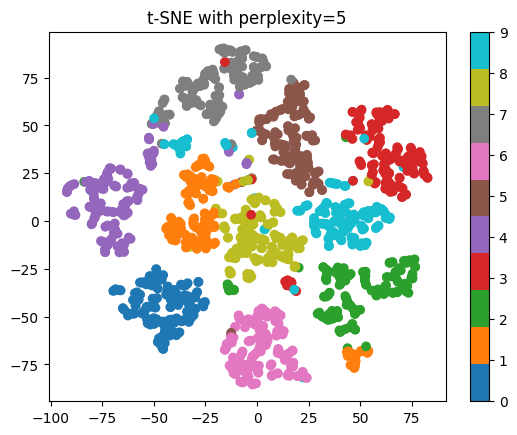

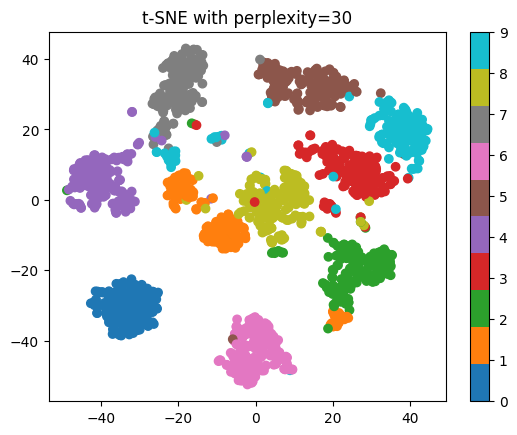

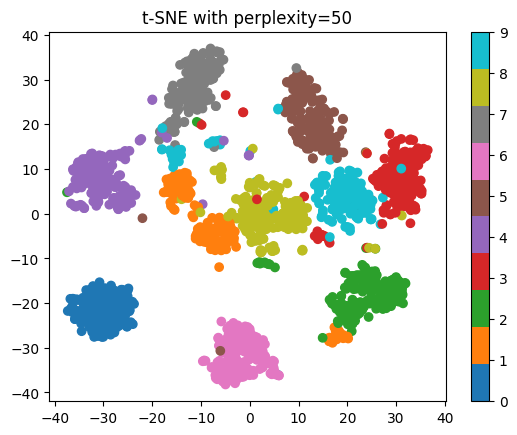

In [9]:
# Run t‑SNE on X_std with different perplexities and compare the 2‑D embeddings
from sklearn.manifold import TSNE
perplexities = [5, 30, 50]
for perplextity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplextity, random_state=42)
    X_tsne = tsne.fit_transform(X_std)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=digits.target, cmap='tab10')
    plt.title(f't-SNE with perplexity={perplextity}')
    plt.colorbar()
    plt.show()



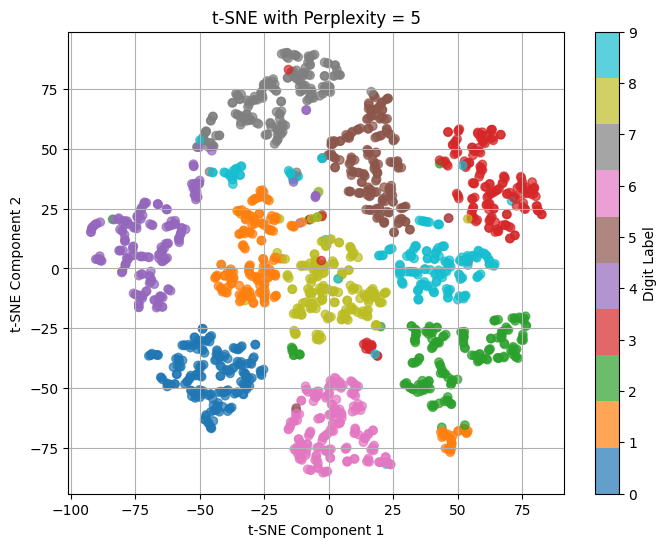

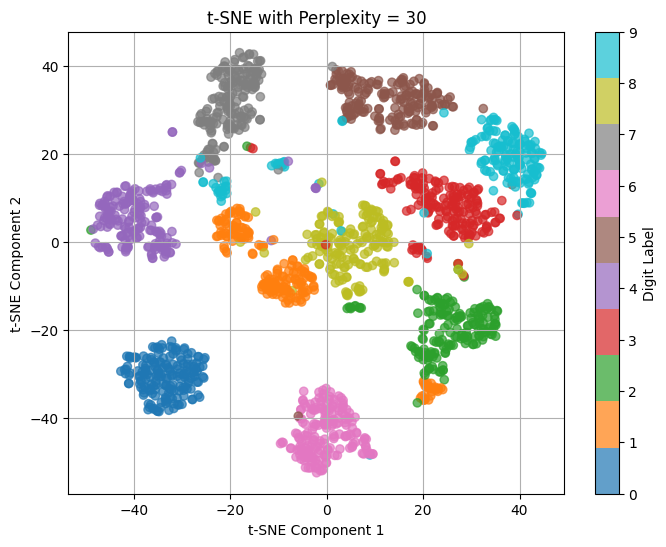

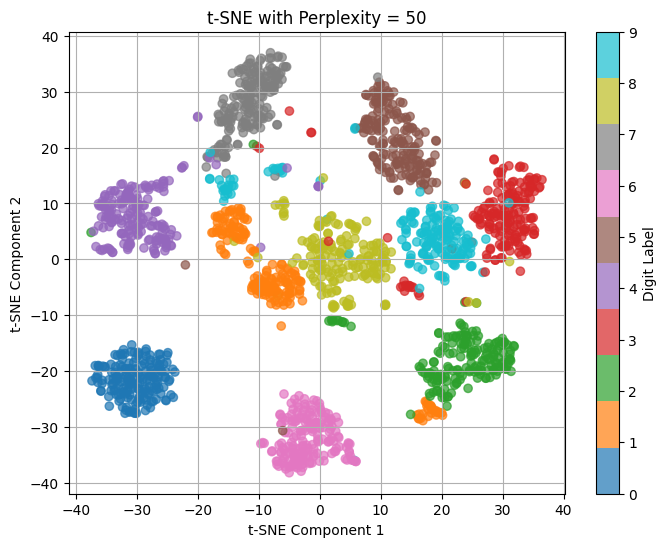

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Assume X_std is already loaded and is a NumPy array or pandas DataFrame
# Example if you don't have X_std:
# from sklearn.datasets import make_blobs
# X_std, _ = make_blobs(n_samples=500, n_features=50, centers=5, random_state=42)

perplexities = [5, 30, 50]

for perplexity in perplexities:
    # Initialize t-SNE with the current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)

    # Fit and transform the data
    X_tsne = tsne.fit_transform(X_std)

    # Create the scatter plot without coloring by labels
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X_tsne[:, 0],
        X_tsne[:, 1],
        c= digits.target,
        cmap='tab10',
        alpha=0.7
    )

    plt.title(f't-SNE with Perplexity = {perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Digit Label')
    plt.grid(True)
    plt.show()